# Data loading and preprocessing

# Handling missing values & data cleaning

# Descriptive statistics and summary

# Visualization (Univariate, bivariate,multivariate)

# Insights on churn behavior

In [5]:
# Ioad important libraries for EDA project

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# lets load the data into df variable

In [8]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# As we seen , the data is huge.so all columns no showing
#so lets check the total columns name

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# lets check the shape of data

In [13]:
df.shape

(7043, 21)

In [14]:
# the dataser contain 7043 rows indicate customers with 21 features
# Each row represent a unique customer with various attributes
# related demographic,service,and billing
# the dataset size is sufficient for meaningful analysis and prediction
# with 21 features,we have a good mix of categorical and numerical
# to explore customer behavior and churn pattern

In [15]:
# lets check deta type of each feature

In [16]:
  df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [17]:
# most of the columns are categorical(objec type)
# seniorcirizen is stored in int64 , but since its a binary variable
# 0 & 1 it be treted as categorical
# total charges is stores as an object, which seems incorrect
# since it represent a numerical values
# it may contain missing values or be formatted incorrect
# we need to convert it to float for proper analysis

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors= 'coerce')

In [19]:
# check the conversion

In [20]:
df['TotalCharges'].dtype

dtype('float64')

In [21]:
# Check for missing values

In [22]:
# only one columns totalcharges has missing values
# 11 missing values
#since total charges is numerical , these missing values were
# likely empty spaces in original dataset before conversion
# possible ways to handle missing values:-
# 1 - Fill them with median or mean of totalcharges
# 2 - fill them with zero , but total charges not be zero
# 3 - Drop these 11 rows, but if we do 11 customer also drop
# from 7043 . we may loss data
# so better to fill the missing value
# fill them with median because is good if we may contain outliers

In [23]:
df['TotalCharges'].median()

1397.475

In [24]:
df['TotalCharges'].mean()

np.float64(2283.3004408418656)

In [25]:
# lets check dublicate records

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
# check for the senior citizen

In [29]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [30]:
# Around 16% of the customers are senior citizen

# so lets checks for the churn rate

In [53]:
df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() *100

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


In [33]:
# Insights may check the senior citisens income source..
# if we impliment the discount for the sinior citizen then the churn
# rate may minimize
# may be they dont get better customer support. eg. phone assistance
# Implimentation and simplified and payment option


<Axes: xlabel='SeniorCitizen', ylabel='count'>

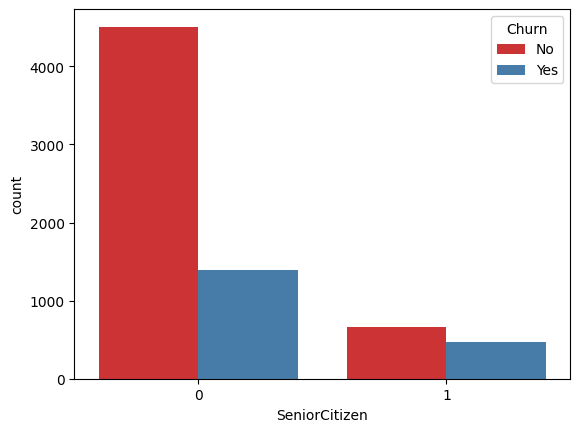

In [38]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", palette="Set1")

In [43]:
seniordf= df[df['SeniorCitizen']==1]

In [46]:
sc = seniordf.groupby("SeniorCitizen")["Churn"].value_counts(=Tnormalizerue).unstack()*100

In [47]:
sc

Churn,No,Yes
SeniorCitizen,,
1,58.318739,41.681261


In [56]:
df.groupby('Partner')["Churn"].value_counts(normalize=True)*100

Partner  Churn
No       No       67.042021
         Yes      32.957979
Yes      No       80.335097
         Yes      19.664903
Name: proportion, dtype: float64

Text(0.5, 1.0, 'proportion of Senior Citizen')

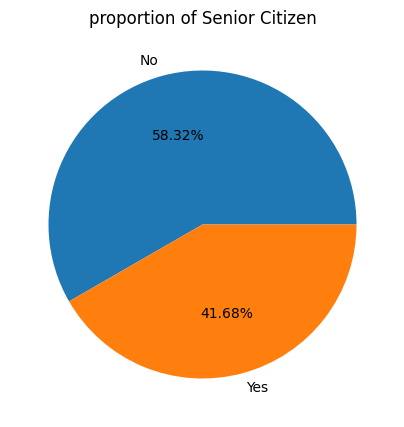

In [61]:

plt.figure(figsize= (5,5))
plt.pie(SC.loc[1].values, labels=SC.loc[1].index, autopct="%1.2f%%")
plt.title("proportion of Senior Citizen")

In [60]:
SC = Seniordf.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()*100

In [59]:
Seniordf = df[df['SeniorCitizen']==1]